In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## Calculating heat diffusion in underground rocks



In [25]:
#defining constants

diffusion_rate = 1e-6
K = diffusion_rate
start_temp = 15
Nz = 500
dz = 1/4

Nt = 5000
dt = (365*24*60*60)/Nt 


u = start_temp * np.ones((Nz+1,Nt+1))

In [26]:
print(u.shape)

(501, 5001)


In [27]:
time = np.linspace(0,12, Nt+1)
print(time.shape)
print(time)

(5001,)
[0.00000e+00 2.40000e-03 4.80000e-03 ... 1.19952e+01 1.19976e+01
 1.20000e+01]


In [41]:
def heat_equa(u,time,dz):

    max_iter = 100
    epsilon = 1e-6

    err = []

    #surface condition
    u[0,:] = 15 - (10*np.sin(2*np.pi*time/12))

    for itera in range(max_iter):


        u_old = u
        u[:,0] = u_old[:,-1]

        for i in range(1,Nt+1):
            depth = (u[0:-1-2,i-1] - 2* u[1:-1-1, i-1] + u[2:-1, i-1])/ (dz**2)
            time_1d = K*depth

            u[1:-1-1,i] = time_1d * dt + u[1:-1-1,i-1]
            u[-1,i] = u[-1-1, i] #condition a la limite du fond


        print(u - u_old)
        err.append(np.max(abs(u - u_old)) )

        if err[-1] < epsilon:
            print(itera)
            break
    
    return u 



In [43]:
u = heat_equa(u,time,dz)
u.shape

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
0


(501, 5001)

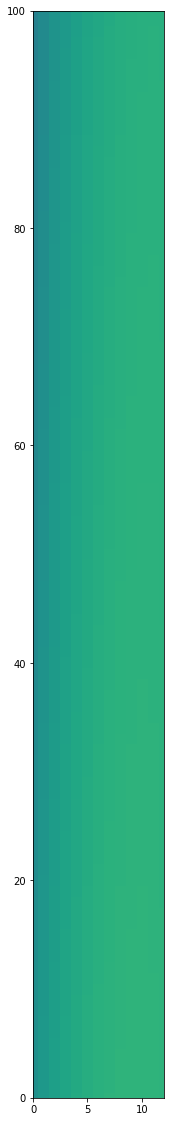

In [45]:
xmin = 0
xmax = 12

ymin = 0
ymax = 100

fig, ax = plt.subplots(figsize=(20, 20))
ax.set(xlim=(xmin, xmax), ylim=(ymin, ymax))

plt.imshow(u.T,cmap='viridis')

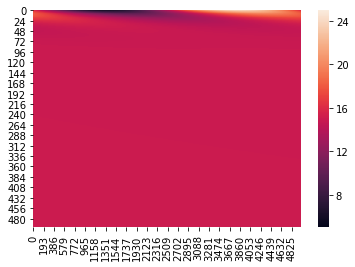

In [46]:
xmin = 0
xmax = 12

ymin = 0
ymax = 100


sns.heatmap(u)